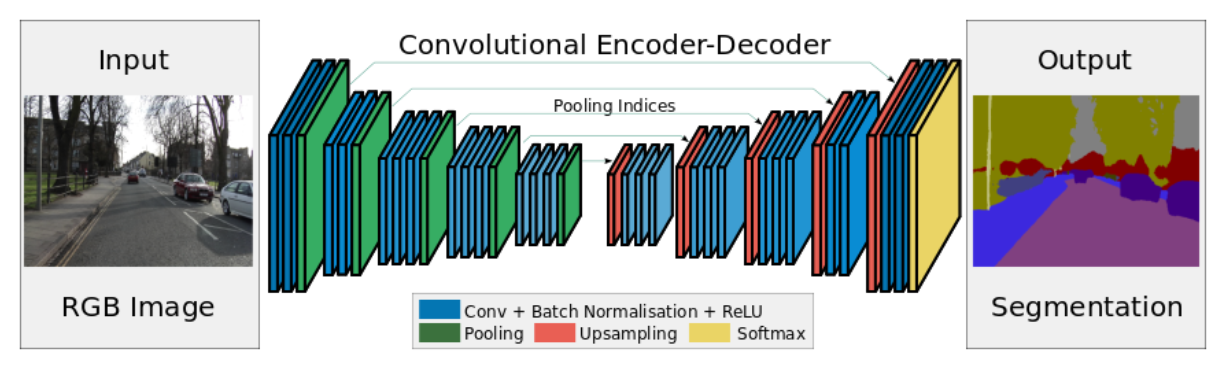

In [ ]:
keras.preprocessing.image.load_img('/content/SegNet.PNG')

In [ ]:
from tensorflow import keras

## Model Building

In [ ]:
class SegNet:
    def __init__(self, image_size):
        self.image_size = image_size

    def down_block_1(self, x, filters, kernel_size=(3, 3), padding="same", strides=1):
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
        p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
        return c, p

    def down_block_2(self, x, filters, kernel_size=(3, 3), padding="same", strides=1):
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
        p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
        return c, p

    def up_block_1(self, x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
        us = keras.layers.UpSampling2D((2, 2))(x)
        concat = keras.layers.Concatenate()([us, skip])
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
        return c

    def up_block_2(self, x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
        us = keras.layers.UpSampling2D((2, 2))(x)
        concat = keras.layers.Concatenate()([us, skip])
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
        c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
        return c

    def make_model(self):
        f = [16, 32, 64, 128, 256]
        inputs = keras.layers.Input((self.image_size, self.image_size, 3))
        
        p0 = inputs
        c1, p1 = self.down_block_1(p0, f[0]) #128 -> 64
        c2, p2 = self.down_block_1(p1, f[1]) #64 -> 32
        c3, p3 = self.down_block_2(p2, f[2]) #32 -> 16
        c4, p4 = self.down_block_2(p3, f[3]) #16 -> 8
        c5, p5 = self.down_block_2(p4, f[4]) #8 -> 4
        
        u1 = self.up_block_1(p5, c5, f[4]) #4 -> 8
        u2 = self.up_block_1(u1, c4, f[3]) #8 -> 16
        u3 = self.up_block_1(u2, c3, f[2]) #16 -> 32
        u4 = self.up_block_2(u3, c2, f[1]) #32 -> 64
        u5 = self.up_block_2(u4, c1, f[0]) #64 -> 128
        
        outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="softmax")(u5)
        model = keras.models.Model(inputs, outputs)
        print('Model is not compiled by default. Make a call to `model.compile()` method')
        
        return model

In [ ]:
segnet = SegNet(image_size = 128)
model = segnet.make_model()

Model is not compiled by default. Make a call to `model.compile()` method


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_80 (Conv2D)              (None, 128, 128, 16) 448         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 128, 128, 16) 2320        conv2d_80[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_20 (MaxPooling2D) (None, 64, 64, 16)   0           conv2d_81[0][0]                  
____________________________________________________________________________________________

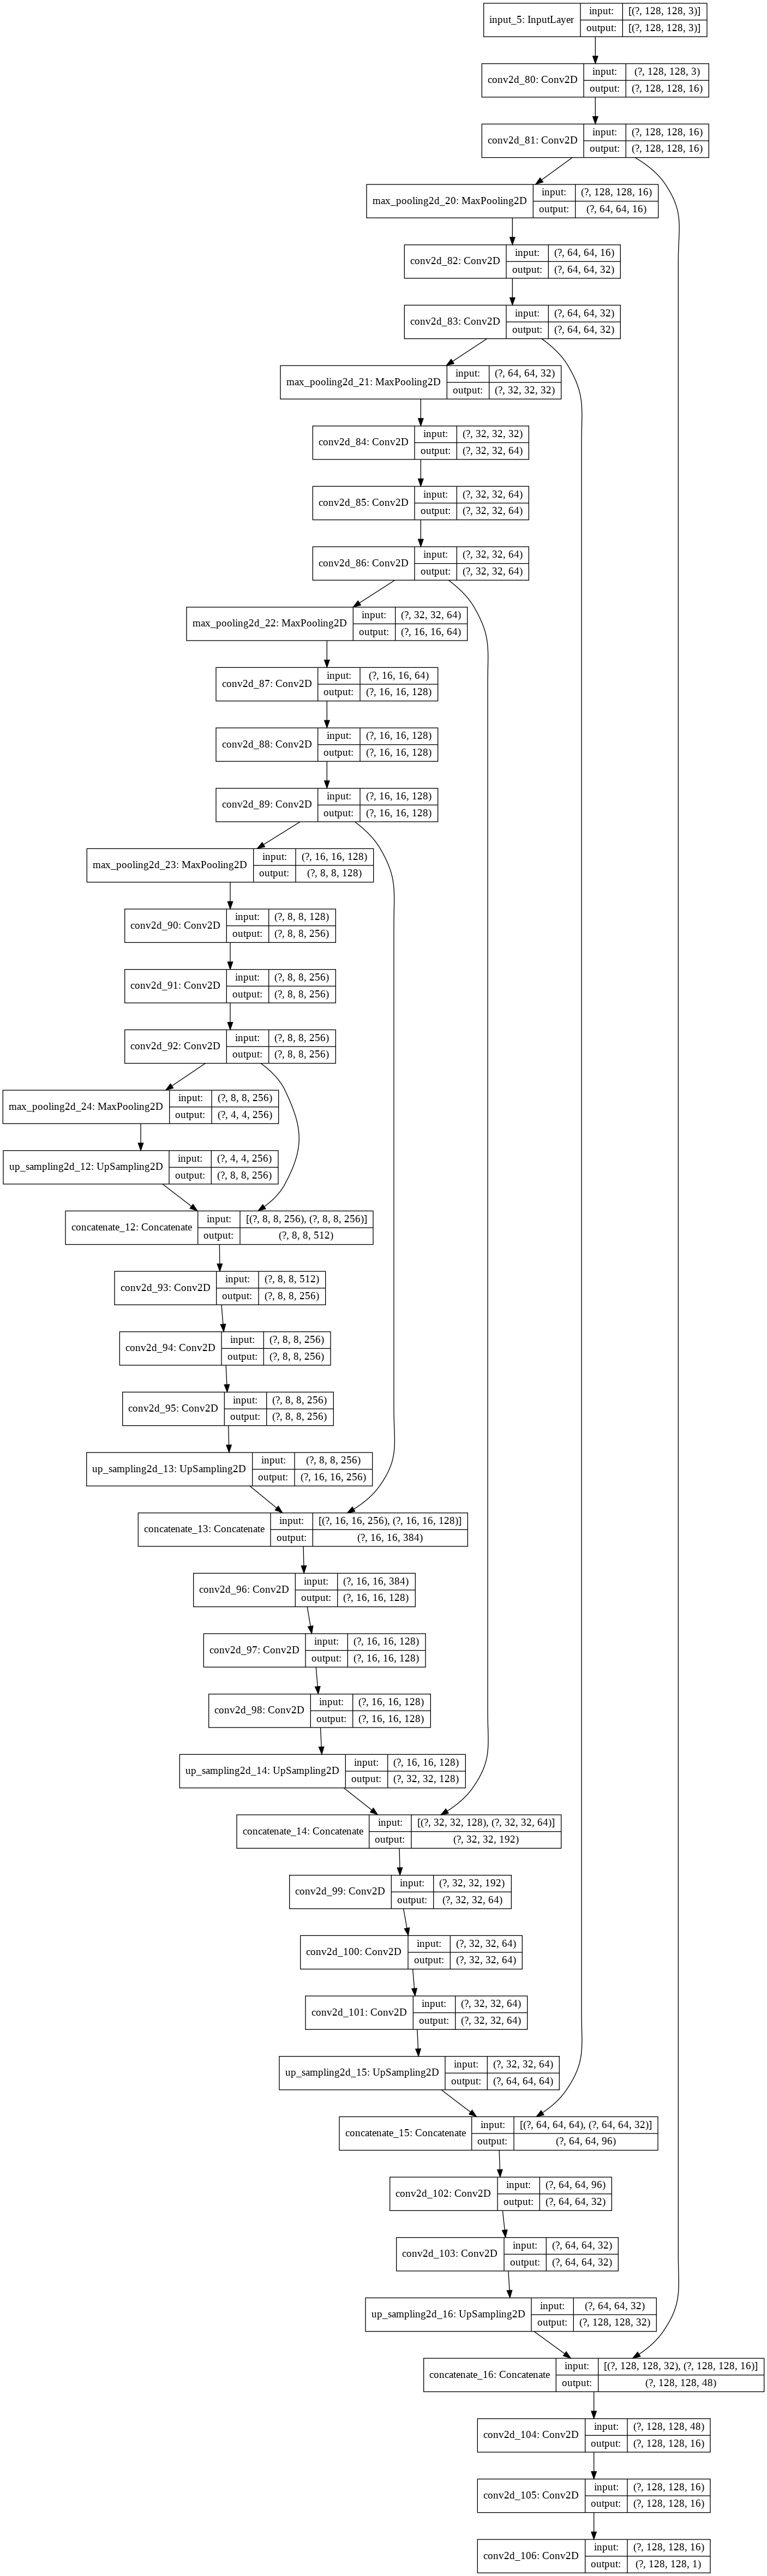

In [ ]:
keras.utils.plot_model(model, to_file='segnet.png', show_shapes=True)